## Reddit : hyper link network

The hyperlink network represents the directed connections between two subreddits. Using these hyperlinks as edges in a social network, we analyse the social network known as Reddit

### Downloading dataset

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
!wget 'https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv'
!wget 'https://snap.stanford.edu/data/soc-redditHyperlinks-title.tsv'

--2023-04-04 07:52:09--  https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318931394 (304M) [text/tab-separated-values]
Saving to: ‘soc-redditHyperlinks-body.tsv’

soc-redditHyperlink 100%[===================>] 304.16M  16.1MB/s    in 23s     

2023-04-04 07:52:33 (13.3 MB/s) - ‘soc-redditHyperlinks-body.tsv’ saved [318931394/318931394]

--2023-04-04 07:52:33--  https://snap.stanford.edu/data/soc-redditHyperlinks-title.tsv
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368581209 (352M) [text/tab-separated-values]
Saving to: ‘soc-redditHyperlinks-title.tsv’

soc-redditHyperlink 100%[===================>] 351.51M  16.4MB/s  

### Preprocessing the dataset

In [ ]:
import pandas as pd
df1=pd.read_csv("soc-redditHyperlinks-title.tsv",sep='\t')
print(df1.head)

df=df1.iloc[:,[0,1]]
print(df.head)

<bound method NDFrame.head of          SOURCE_SUBREDDIT     TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
0              rddtgaming             rddtrust  1u4pzzs  2013-12-31 16:39:18   
1                 xboxone        battlefield_4  1u4tmfs  2013-12-31 17:59:11   
2                     ps4        battlefield_4  1u4tmos  2013-12-31 17:59:40   
3       fitnesscirclejerk            leangains  1u50xfs  2013-12-31 19:01:56   
4       fitnesscirclejerk          lifeprotips  1u51nps  2013-12-31 21:02:28   
...                   ...                  ...      ...                  ...   
571922    seattleshitshow            seattlewa   68iptp  2017-04-27 11:07:31   
571923   peoplewhosayheck            spiderman  68iqh6s  2017-04-30 16:36:07   
571924               vzla                  wtf  68iqkcs  2017-04-30 15:50:07   
571925      denverbroncos                  nfl   68iqt8  2017-04-30 16:11:30   
571926   shitpoliticssays  politicaldiscussion  68ir4os  2017-04-30 15:14:05   

        L

In [ ]:
df1.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'PROPERTIES'],
      dtype='object')

In [ ]:
import pandas as pd
# Calculate the edge weight for each record
edge_weights = []
for i, row in df1.iterrows():
    # Parse the PROPERTIES field
    properties = list(map(float, row['PROPERTIES'].split(',')))

    # Calculate the sentiment score using VADER

    # Calculate the edge weight
    edge_weight = (properties[18] - properties[19]) * properties[1]
    edge_weights.append(edge_weight)

# Add the edge weight column to the dataframe
df1['EDGE_WEIGHT'] = edge_weights

In [ ]:
df1['EDGE_WEIGHT']

0          0.000
1         17.160
2         17.160
3          0.000
4          0.000
           ...  
571922     0.000
571923     0.000
571924     0.000
571925    -4.187
571926   -15.494
Name: EDGE_WEIGHT, Length: 571927, dtype: float64

In [ ]:
dff=pd.read_csv("soc-redditHyperlinks-body.tsv",sep='\t')
df2=dff.iloc[:,[0,1]]
print(df2.head)

<bound method NDFrame.head of            SOURCE_SUBREDDIT   TARGET_SUBREDDIT
0           leagueoflegends    teamredditteams
1                theredlion             soccer
2              inlandempire             bikela
3                       nfl                cfb
4                playmygame            gamedev
...                     ...                ...
286556           negareddit      debatefascism
286557          mildlynomil          justnomil
286558               mmorpg  blackdesertonline
286559  electricskateboards          askreddit
286560                mgtow    dataisbeautiful

[286561 rows x 2 columns]>


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate the edge weight for each record
edge_weights = []
for i, row in dff.iterrows():
    # Parse the PROPERTIES field
    properties = list(map(float, row['PROPERTIES'].split(',')))

    # Calculate the sentiment score using VADER

    # Calculate the edge weight
    edge_weight = (properties[18] - properties[19]) * properties[1]
    edge_weights.append(edge_weight)

# Add the edge weight column to the dataframe
dff['EDGE_WEIGHT'] = edge_weights

In [ ]:
dff['EDGE_WEIGHT']

0          -2.086
1          46.256
2           0.000
3         120.523
4          62.200
           ...   
286556     -9.315
286557   -100.170
286558     34.542
286559     34.474
286560     -6.825
Name: EDGE_WEIGHT, Length: 286561, dtype: float64

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import pandas as pd

df1_sampled = df1.sample(frac=0.25, random_state=42)

In [ ]:
import pandas as pd
import cupy as cp

# convert string data to numeric data
df1_sampled['SOURCE_SUBREDDIT'] = pd.Categorical(df1_sampled['SOURCE_SUBREDDIT'])
df1_sampled['TARGET_SUBREDDIT'] = pd.Categorical(df1_sampled['TARGET_SUBREDDIT'])
df1_sampled['SOURCE_SUBREDDIT'] = df1_sampled['SOURCE_SUBREDDIT'].cat.codes
df1_sampled['TARGET_SUBREDDIT'] = df1_sampled['TARGET_SUBREDDIT'].cat.codes


# create list of all unique subreddits
subreddits = cp.unique(cp.asarray(df1_sampled[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']].values))

# create adjacency matrix
adj_matrix = cp.zeros((len(subreddits), len(subreddits)))
for i, subreddit1 in enumerate(subreddits):
    for j, subreddit2 in enumerate(subreddits):
        # get all edges between the two subreddits
        edges = df1_sampled[(df1_sampled['SOURCE_SUBREDDIT']==subreddit1.get()) & (df1_sampled['TARGET_SUBREDDIT']==subreddit2.get())]
        if len(edges) > 0:
            # if there are edges, set the weight to the sum of the edge weights
            adj_matrix[i,j] = edges['EDGE_WEIGHT'].sum()

# print adjacency matrix
print(adj_matrix)


In [ ]:
import networkx as nx

# Create a graph from the edge list
G = nx.Graph()
edges = df1[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']].values.tolist()
G.add_edges_from(edges)

# Run the greedy modularity algorithm
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Print the communities
for i, c in enumerate(communities):
    print(f"Community {i+1}: {c}")


### Downloading edge list of dataset for Gephi

In [ ]:
num_rows = 5000

random_rows = df.sample(n=num_rows)
body_df = pd.DataFrame(random_rows)

random_rows = df2.sample(n=num_rows)
title_df = pd.DataFrame(random_rows)

body_df.to_csv('titles.csv', index=False)
title_df.to_csv('bodies.csv', index=False)

from google.colab import files

files.download('titles.csv')
files.download('bodies.csv')

In [ ]:
df_nodes = pd.DataFrame(df[['SOURCE_SUBREDDIT']].values.tolist() + df[['TARGET_SUBREDDIT']].values.tolist(), columns=['node'])
df_nodes = df_nodes.drop_duplicates()
df_nodes = df_nodes.reset_index(drop=True)

G=nx.from_pandas_edgelist(df, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', create_using=nx.DiGraph)

### Basic descriptive calculations

In [ ]:
#basic descriptive calculations
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)
density = nx.density(G)
transitivity = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)
print("Number of Nodes: %s" % num_nodes)
print("Number of Edges: %s" % num_edges)
print("Density: %s" % density)
print("Transitivity: %s" % transitivity)
print("Avg. Clustering: %s" % avg_clustering)

Number of Nodes: 7137
Number of Edges: 15724
Density: 0.0003087397136503951
Transitivity: 0.021448740802750197
Avg. Clustering: 0.06157296087003644


In [ ]:
indegree_centrality = nx.in_degree_centrality(G)

In [ ]:
eigenvector_centraility = nx.eigenvector_centrality(G)

In [ ]:
closeness_centrality   = nx.closeness_centrality(G)

In [ ]:
betweeness_centrality = nx.betweenness_centrality(G)

In [ ]:
pagerank = nx.pagerank(G, alpha=0.85)

In [ ]:
clustering_coef  = nx.clustering(G)

In [ ]:
df_metrics = pd.DataFrame(dict(
    in_degree = indegree_centrality,
    eigenvector = eigenvector_centraility,
    closeness = closeness_centrality,
    betweeness = betweeness_centrality,
    clustering = clustering_coef,
    pagerank = pagerank
))

In [ ]:
df_metrics.index.name='subreddit'
df_metrics.to_csv('centrality-metrics.csv')

In [ ]:
df_metrics

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
rddtgaming,0.000000,2.181357e-16,0.000000,0.000000,0.000000,0.000057
rddtrust,0.000140,2.835764e-15,0.000140,0.000000,0.000000,0.000082
xboxone,0.001962,2.352750e-02,0.125808,0.001043,0.143911,0.000652
battlefield_4,0.002242,3.454111e-02,0.130801,0.001300,0.091398,0.001062
ps4,0.002102,4.157196e-02,0.134050,0.000669,0.152120,0.000631
...,...,...,...,...,...,...
odst,0.000140,6.546350e-05,0.080894,0.000000,0.000000,0.000078
exwithalemonadestand,0.000140,3.475643e-03,0.106197,0.000000,0.000000,0.000059
lamecomebacks,0.000000,2.181357e-16,0.000000,0.000000,0.000000,0.000057


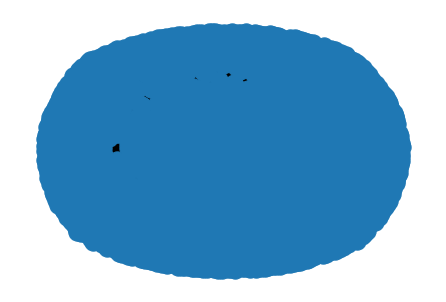

In [ ]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

In [ ]:
target_subreddits=df['TARGET_SUBREDDIT']

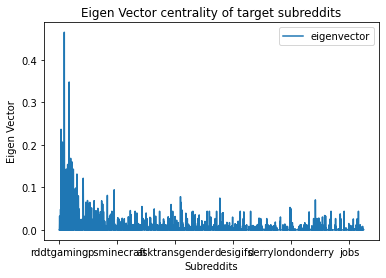

In [ ]:
#Plotting centrality
df_metrics.plot(y='eigenvector')
plt.xlabel("Subreddits")
plt.ylabel("Eigen Vector")
plt.title("Eigen Vector centrality of target subreddits")
plt.show()

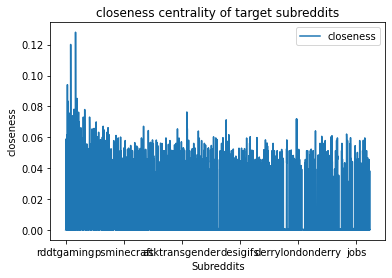

In [ ]:
df_metrics.plot(y='closeness')
plt.xlabel("Subreddits")
plt.ylabel("closeness")
plt.title("closeness centrality of target subreddits")
plt.show()

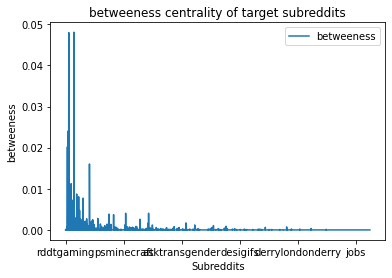

In [ ]:
df_metrics.plot(y='betweeness')
plt.xlabel("Subreddits")
plt.ylabel("betweeness")
plt.title("betweeness centrality of target subreddits")
plt.show()

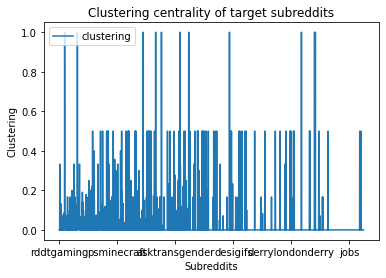

In [ ]:
df_metrics.plot(y='clustering')
plt.xlabel("Subreddits")
plt.ylabel("Clustering")
plt.title("Clustering centrality of target subreddits")
plt.show()

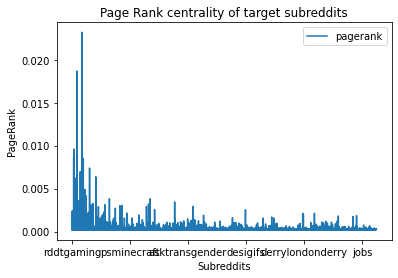

In [ ]:
df_metrics.plot(y='pagerank')
plt.xlabel("Subreddits")
plt.ylabel("PageRank")
plt.title("Page Rank centrality of target subreddits")
plt.show()

In [ ]:
df_metrics.max()


in_degree      0.063310
eigenvector    0.465233
closeness      0.128031
betweeness     0.048061
clustering     1.000000
pagerank       0.023205
dtype: float64

In [ ]:
df_metrics.iloc[:,df_metrics.max()]

In [ ]:
df_metrics

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
rddtgaming,0.000000,6.687924e-14,0.000000,0.000000,0.000000,0.000186
rddtrust,0.000381,1.070068e-12,0.000381,0.000000,0.000000,0.000264
xboxone,0.001144,1.102848e-02,0.049816,0.000004,0.000000,0.000566
battlefield_4,0.002670,3.257235e-02,0.058886,0.000137,0.011364,0.002412
ps4,0.000763,1.360373e-02,0.049915,0.000035,0.333333,0.000425
...,...,...,...,...,...,...
morrowind,0.000381,1.070068e-12,0.000381,0.000000,0.000000,0.000238
roku,0.000000,6.687924e-14,0.000000,0.000000,0.000000,0.000186
luciddreams,0.000000,6.687924e-14,0.000000,0.000000,0.000000,0.000186


In [ ]:
df_metrics[df_metrics['in_degree']==df_metrics['in_degree'].max()]

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
iama,0.06331,0.348068,0.128031,0.0,0.005586,0.023205


In [ ]:
df_metrics[df_metrics['eigenvector']==df_metrics['eigenvector'].max()]

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
askreddit,0.057208,0.465233,0.120123,0.0,0.008456,0.018697


In [ ]:
df_metrics[df_metrics['closeness']==df_metrics['closeness'].max()]

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
iama,0.06331,0.348068,0.128031,0.0,0.005586,0.023205


In [ ]:
df_metrics[df_metrics['betweeness']==df_metrics['betweeness'].max()]

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
todayilearned,0.024027,0.15408,0.078148,0.048061,0.03467,0.006962


In [ ]:
df_metrics[df_metrics['clustering']==df_metrics['clustering'].max()]

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
languagelearning,0.000381,4.931089e-05,0.029899,0.0,1.0,0.000196
greenbaypackers,0.000763,1.449558e-02,0.045915,0.0,1.0,0.000490
dogeducation,0.000381,2.675765e-02,0.055943,0.0,1.0,0.000300
maddoge,0.000763,3.244168e-02,0.055959,0.0,1.0,0.000427
leafs,0.000000,6.687924e-14,0.000000,0.0,1.0,0.000186
panthers,0.000381,4.727549e-03,0.040428,0.0,1.0,0.000269
customsmash,0.000763,3.270462e-03,0.043498,0.0,1.0,0.000468
christian_ancaps,0.000381,1.727399e-02,0.047808,0.0,1.0,0.000336
scifiwriting,0.000000,6.687924e-14,0.000000,0.0,1.0,0.000186


In [ ]:
df_metrics[df_metrics['pagerank']==df_metrics['pagerank'].max()]

,in_degree,eigenvector,closeness,betweeness,clustering,pagerank
subreddit,,,,,,
iama,0.06331,0.348068,0.128031,0.0,0.005586,0.023205


In [ ]:
nx.draw_spring(G)

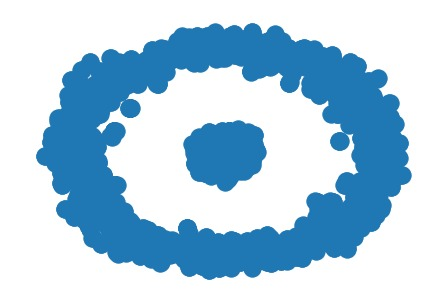

## LSTM model
To predict whether the hyperlink will cause a large enough mobilisation of one community to participate in another using a LSTM model. The model is a "socially-primed" LSTM that uses vector embeddings of users and communities.

In [ ]:
!wget 'http://snap.stanford.edu/conflict/conflict_data.zip'

--2023-03-28 17:48:49--  http://snap.stanford.edu/conflict/conflict_data.zip
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1412333850 (1.3G) [application/zip]
Saving to: ‘conflict_data.zip.1’

conflict_data.zip.1 100%[===================>]   1.31G  38.0MB/s    in 35s     

2023-03-28 17:49:24 (38.8 MB/s) - ‘conflict_data.zip.1’ saved [1412333850/1412333850]



In [ ]:
!unzip 'conflict_data.zip'

Archive:  conflict_data.zip
replace prediction/detailed_data/tokenized_posts.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Using embeddings got from node2Vec algorithm, as well as the pretrained word embeddings learned from the GloVe algorithm

In [ ]:
CUDA=True 
DATA_HOME="/content/prediction"
LOG_DIR="/content/prediction"
PRINT_TEST=False

TRAIN_DATA=DATA_HOME+"/preprocessed_train_data.pkl"
VAL_DATA=DATA_HOME+"/preprocessed_val_data.pkl"
TEST_DATA=DATA_HOME+"/preprocessed_test_data.pkl"
BATCH_SIZE=512

WORD_EMBEDS=DATA_HOME+"/embeddings/glove_word_embeds.txt"

USER_EMBEDS=DATA_HOME+"/embeddings/user_vecs.npy"
USER_IDS=DATA_HOME+"/embeddings/user_vecs.vocab"

SUBREDDIT_EMBEDS=DATA_HOME+"/embeddings/sub_vecs.npy"
SUBREDDIT_IDS=DATA_HOME+"/embeddings/sub_vecs.vocab"

POST_INFO=DATA_HOME+"/detailed_data/post_crosslink_info.tsv"
LABEL_INFO=DATA_HOME+"/detailed_data/label_info.tsv"
PREPROCESSED_DATA=DATA_HOME+"/detailed_data/tokenized_posts.tsv"

VOCAB_SIZE = 174558
NUM_USERS = 118381
NUM_SUBREDDITS = 51278
WORD_EMBED_DIM = 300
METAFEAT_LEN = 263
NUM_CLASSES = 1
MAX_LEN=50


In [ ]:
import heapq

import numpy as np

def ugly_normalize(vecs):
   normalizers = np.sqrt((vecs * vecs).sum(axis=1))
   normalizers[normalizers==0]=1
   return (vecs.T / normalizers).T

class Embeddings:
   def __init__(self, vecsfile, vocabfile=None, normalize=True):
      if vocabfile is None: vocabfile = vecsfile.replace("npy","vocab")
      self._vecs = np.load(vecsfile)
      self._vocab = open(vocabfile).read().split()
      if normalize:
         self._vecs = ugly_normalize(self._vecs)
      self._w2v = {w:i for i,w in enumerate(self._vocab)}

   @classmethod
   def load(cls, vecsfile, vocabfile=None):
      return Embeddings(vecsfile, vocabfile)

   def word2vec(self, w):
      return self._vecs[self._w2v[w]]

   def similar_to_vec(self, v, N=10):
      sims = self._vecs.dot(v)
      sims = heapq.nlargest(N, zip(sims,self._vocab,self._vecs))
      return sims

   def most_similar(self, word, N=10):
      w = self._vocab.index(word)
      sims = self._vecs.dot(self._vecs[w])
      sims = heapq.nlargest(N, zip(sims,self._vocab))
      return sims

   def analogy(self, pos1, neg1, pos2,N=10,mult=True):
      wvecs, vocab = self._vecs, self._vocab
      p1 = vocab.index(pos1)
      p2 = vocab.index(pos2)
      n1 = vocab.index(neg1)
      if mult:
         p1,p2,n1 = [(1+wvecs.dot(wvecs[i]))/2 for i in (p1,p2,n1)]
         if N == 1:
            return max(((v,w) for v,w in zip((p1 * p2 / n1),vocab) if w not in [pos1,pos2,neg1]))
         return heapq.nlargest(N,((v,w) for v,w in zip((p1 * p2 / n1),vocab) if w not in [pos1,pos2,neg1]))
      else:
         p1,p2,n1 = [(wvecs.dot(wvecs[i])) for i in (p1,p2,n1)]
         if N == 1:
            return max(((v,w) for v,w in zip((p1 + p2 - n1),vocab) if w not in [pos1,pos2,neg1]))
         return heapq.nlargest(N,((v,w) for v,w in zip((p1 + p2 - n1),vocab) if w not in [pos1,pos2,neg1]))

In [ ]:
import torch
import random
import argparse
import pickle
import torch.nn as nn
import numpy as np

from torch.autograd import Variable
from sklearn.metrics import roc_auc_score


class SocialLSTM(nn.Module):
    def _load_glove_embeddings(self):
        print("Loading word embeddings...")
        with open(WORD_EMBEDS) as fp:
            embeddings = np.empty((VOCAB_SIZE, WORD_EMBED_DIM), dtype=np.float32)
            for i, line in enumerate(fp):
                embeddings[i,:] = list(map(float, line.split()[1:]))
        return embeddings

    def _load_user_embeddings(self):
        print ("Loading user embeddings...")
        embeds = Embeddings(USER_EMBEDS)
        return embeds._vecs

    def _load_subreddit_embeddings(self):
        print ("Loading subreddit embeddings...")
        embeds = Embeddings(SUBREDDIT_EMBEDS)
        return embeds._vecs

    def __init__(self, hidden_dim, batch_size=BATCH_SIZE, prepend_social=True, include_meta=False,
            dropout=None, final_dense=True, include_embeds=False):
        """
        hidden_dim - size of internal LSTM layers
        batch_size - size of minibatches during training
        preprend_social - if True then user/subreddit embeds are prepended.
                          if False then user/subreddit embeds are appended.
                          if None then user/subreddit embeds are not fed to the LSTM.
        include_meta - if True then metadata/linguistic/hand-engineered features are included
        dropout - how much dropout in the LSTM layer connections; if None then single-layer LSTM is used.
        final_dense - whether to include an extra dense Linear+ReLU layer before the softmax (same dimension as LSTM)
        include_embeds - whether to include the user/subreddit layers in the final (i.e, post-lstm) layer(s)
        """
        super(SocialLSTM, self).__init__()
        glove_embeds = self._load_glove_embeddings()
        self.glove_embeds= torch.FloatTensor(glove_embeds)
        self.pad_embed = torch.zeros(1, WORD_EMBED_DIM)
        self.unk_embed = torch.FloatTensor(1,WORD_EMBED_DIM)
        self.unk_embed.normal_(std=1./np.sqrt(WORD_EMBED_DIM))
        self.word_embeds = nn.Parameter(torch.cat([self.glove_embeds, self.pad_embed, self.unk_embed], dim=0), requires_grad=False)
        self.embed_module = torch.nn.Embedding(VOCAB_SIZE+2, WORD_EMBED_DIM)
        self.embed_module.weight = self.word_embeds

        user_embeds = self._load_user_embeddings()
        self.user_embeds = torch.nn.Embedding(NUM_USERS+1, WORD_EMBED_DIM)
        self.user_embeds.weight  = nn.Parameter(torch.cat([torch.FloatTensor(user_embeds),  
            self.pad_embed]), requires_grad=False)

        subreddit_embeds = self._load_subreddit_embeddings()
        self.subreddit_embeds = torch.nn.Embedding(NUM_SUBREDDITS+1, WORD_EMBED_DIM)
        self.subreddit_embeds.weight  = nn.Parameter(torch.cat([torch.FloatTensor(subreddit_embeds), 
            self.pad_embed]), requires_grad=False)

        self.hidden_dim = hidden_dim 
        self.prepend_social = prepend_social

        init_hidden_data = torch.zeros(1 if dropout is None else 2, batch_size, self.hidden_dim)
        #init_hidden_data.normal_(std=1./np.sqrt(self.hidden_dim))
        if CUDA:
            init_hidden_data = init_hidden_data.cuda()
        self.init_hidden = (Variable(init_hidden_data, requires_grad=False),
            Variable(init_hidden_data, requires_grad=False))


        self.rnn = nn.LSTM(input_size=WORD_EMBED_DIM, hidden_size=hidden_dim, 
                num_layers=1 if dropout is None else 2, dropout=0. if dropout is None else dropout)
        
        self.final_dense = final_dense
        self.include_meta = include_meta
        self.include_embeds = include_embeds
        out_layer1_outdim = self.hidden_dim if final_dense else NUM_CLASSES
        if include_meta and include_embeds: 
            self.out_layer1 = nn.Linear(self.hidden_dim+SF_LEN+3*WORD_EMBED_DIM, out_layer1_outdim)
        elif include_embeds:
            self.out_layer1 = nn.Linear(self.hidden_dim+3*WORD_EMBED_DIM, out_layer1_outdim)
        elif include_meta:
            self.out_layer1 = nn.Linear(self.hidden_dim+SF_LEN, out_layer1_outdim)
        else:
            self.out_layer1 = nn.Linear(self.hidden_dim, out_layer1_outdim)
        if self.final_dense:
            self.relu = nn.Tanh()
            self.out_layer2 = nn.Linear(self.hidden_dim, NUM_CLASSES)

    def forward(self, text_inputs, user_inputs, subreddit_inputs, metafeats, lengths):
        text_inputs = self.embed_module(text_inputs)
        user_inputs = self.user_embeds(user_inputs)
        subreddit_inputs = self.subreddit_embeds(subreddit_inputs)
        if self.prepend_social is True:
            inputs = torch.cat([user_inputs, subreddit_inputs, text_inputs], dim=0)
        elif self.prepend_social is False:
            inputs = torch.cat([text_inputs, user_inputs, subreddit_inputs], dim=0)
        else:
            inputs = text_inputs
            lengths = [l-3 for l in lengths]
        inputs  = nn.utils.rnn.pack_padded_sequence(inputs, lengths)
        outputs, h = self.rnn(inputs, self.init_hidden)

        h, lengths = nn.utils.rnn.pad_packed_sequence(outputs)
        h = h.sum(dim=0).squeeze()
        lengths = torch.FloatTensor(lengths.float())
        if CUDA:
            lengths = lengths.cuda()
        h = h.t().div(Variable(lengths))
        self.h = h
#        self.h = h[0][0].t()
#        h = h[0][0].t()
        
        final_input = h.t()
        if self.include_meta:
            final_input = torch.cat([final_input, metafeats.t()], dim=1)
        if self.include_embeds:
            final_input = torch.cat([final_input, user_inputs.squeeze(), subreddit_inputs[0], subreddit_inputs[1]], dim=1)
        if not self.final_dense:
            weights = self.out_layer1(final_input)
        else:
            weights = self.out_layer2(self.relu(self.out_layer1(final_input)))
        return weights

In [ ]:
def load_data(batch_size, max_len):
    print ("Loading train/test data...")
    thread_to_sub = {}
    with open(POST_INFO) as fp:
        for line in fp:
            info = line.split()
            source_sub = info[0]
            target_sub = info[1]
            source_post = info[2].split("T")[0].strip()
            target_post = info[6].split("T")[0].strip()
            thread_to_sub[source_post] = source_sub
            thread_to_sub[target_post] = target_sub

    label_map = {}
    source_to_dest_sub = {}
    with open(LABEL_INFO) as fp:
        for line in fp:
            info = line.split("\t")
            source = info[0].split(",")[0].split("\'")[1]
            dest = info[0].split(",")[1].split("\'")[1]
            label_map[source] = 1 if info[1].strip() == "burst" else 0
            try:
                source_to_dest_sub[source] = thread_to_sub[dest]
            except KeyError:
                continue

    with open(SUBREDDIT_IDS) as fp:
        sub_id_map = {sub:i for i, sub in enumerate(fp.readline().split())}

    with open(USER_IDS) as fp:
        user_id_map = {user:i for i, user in enumerate(fp.readline().split())}

    with open(PREPROCESSED_DATA) as fp:
        words, users, subreddits, lengths, labels, ids = [], [], [], [], [], []
        for i, line in enumerate(fp):
            info = line.split("\t")
            if info[1] in label_map and info[1] in source_to_dest_sub:
                title_words = info[-2].split(":")[1].strip().split(",")
                title_words = title_words[:min(len(title_words), MAX_LEN)]
                if len(title_words) == 0 or title_words[0] == '':
                    continue
                words.append(map(int, title_words))

                body_words = info[-1].split(":")[1].strip().split(",")
                body_words = body_words[:min(len(body_words), MAX_LEN-len(title_words))]
                if not (len(body_words) == 0 or body_words[0] == ''):
                    words[-1].extend(map(int, body_words))

                words[-1] = [VOCAB_SIZE+1 if w==-1 else w for w in words[-1]]

                if not info[0] in sub_id_map:
                    source_sub = NUM_SUBREDDITS
                else:
                    source_sub = sub_id_map[info[0]]
                dest_sub = source_to_dest_sub[info[1]]
                if not dest_sub in sub_id_map:
                    dest_sub = NUM_SUBREDDITS
                else:
                    dest_sub = sub_id_map[dest_sub]
                subreddits.append([source_sub, dest_sub])

                users.append([NUM_USERS if not info[3] in user_id_map else user_id_map[info[3]]])
                ids.append(info[1])

                lengths.append(len(words[-1])+3)
                labels.append(label_map[info[1]])

        batches = []
        np.random.seed(0)
        for count, i in enumerate(np.random.permutation(len(words))):
            if count % batch_size == 0:
                batch_words = np.ones((max_len, batch_size), dtype=np.int64) * VOCAB_SIZE
                batch_users = np.ones((1, batch_size), dtype=np.int64) * VOCAB_SIZE
                batch_subs = np.ones((2, batch_size), dtype=np.int64) * VOCAB_SIZE
                batch_lengths = []
                batch_labels = []
                batch_ids = []
            length = min(max_len, len(words[i]))
            batch_words[:length, count % batch_size] = words[i][:length]
            batch_users[:, count % batch_size] = users[i]
            batch_subs[:, count % batch_size] = subreddits[i]
            batch_lengths.append(length)
            batch_labels.append(labels[i])
            batch_ids.append(ids[i])
            if count % batch_size == batch_size - 1:
                order = np.flip(np.argsort(batch_lengths), axis=0)
                batches.append((list(np.array(batch_ids)[order]),
                    torch.LongTensor(batch_words[:,order]), 
                    torch.LongTensor(batch_users[:,order]), 
                    torch.LongTensor(batch_subs[:,order]), 
                    list(np.array(batch_lengths)[order]),
                    torch.FloatTensor(np.array(batch_labels)[order])))
    return batches

In [ ]:
def get_embeddings(data):

    embeds = []
    ids = []
    for batch in data:
        id, text, users, subs, lengths, metafeats, labels = batch
        text, users, subs, metafeats, labels = Variable(text), Variable(users), Variable(subs), Variable(metafeats), Variable(labels)
        model(text, users, subs, metafeats, lengths)
        batch_embeds = model.h
        embeds.append(batch_embeds.t().data.cpu().numpy())
        ids.extend(id)
    return ids, np.concatenate(embeds)

auc_dict = {}

In [ ]:
def train(model, train_data, val_data, test_data, optimizer, 
        epochs=10, log_every=100, log_file=None, save_embeds=False):
    if not log_file is None:
        lg_str = log_file
        log_file = open(log_file, "w")

    ema_loss = None
    criterion = nn.BCEWithLogitsLoss()
    best_iter = (0., 0,0)
    best_test = 0.
    embeds = None
    
    for epoch in range(epochs):
        random.shuffle(train_data)
        for i, batch in enumerate(train_data):
            _, text, users, subs, lengths, metafeats, labels = batch
            text, users, subs, metafeats, labels = Variable(text), Variable(users), Variable(subs), Variable(metafeats), Variable(labels)
            optimizer.zero_grad()
            outputs = model(text, users, subs, metafeats, lengths)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            if ema_loss is None:
                ema_loss = loss.data.item()
            else:
                ema_loss = 0.01*loss.data.item() + 0.99*ema_loss

            if i % 10 == 0:
                print (epoch, i, ema_loss)
                print (epoch, i, ema_loss,file = log_file)
            if  i % log_every == 0:
                auc = evaluate_auc(model, val_data)
                print ("Val AUC", epoch, i, auc)
                auc_dict[epoch] = (auc)
                if not log_file is None:
                    print ("Val AUC", epoch, i, auc, file = log_file)
                    auc_dict[epoch] = (auc)
                if auc > best_iter[0]:
                    best_iter = (auc, epoch, i)
                    print ("New best val!", best_iter)
                    best_test = evaluate_auc(model, test_data)
                    if auc > 0.7:
                        ids, embeds = get_embeddings(train_data+val_data+test_data)
    print ("Overall best val:", best_iter)
    if not log_file is None:
        print ("Overall best test:", best_test,file = log_file)
        print ("Overall best val:", best_iter,file = log_file)
        if not embeds is None and save_embeds:
            np.save(open(lg_str+"-embeds.npy", "w"), embeds)
            pickle.dump(ids, open(lg_str+"-ids.pkl", "w"))
    return best_iter[0]

In [ ]:
def evaluate_auc(model, test_data):

    predictions = []
    gold_labels = []
    for batch in test_data:
        _, text, users, subs, lengths, metafeats, labels = batch
        if CUDA:
            gold_labels.extend(labels.cpu().numpy().tolist())
        else:
            gold_labels.extend(labels.numpy().tolist())
        text, users, subs, metafeats, labels = Variable(text), Variable(users), Variable(subs), Variable(metafeats), Variable(labels)
        outputs = model(text, users, subs, metafeats, lengths)
        if CUDA:
            predictions.extend(outputs.data.squeeze().cpu().numpy().tolist())
        else:
            predictions.extend(outputs.data.squeeze().numpy().tolist())

    auc = roc_auc_score(gold_labels, predictions)
    return auc

In [ ]:
if __name__ == "__main__":
    # args = argparse.parse_args()
    parser = argparse.ArgumentParser()
    parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")

    parser.add_argument("--learning_rate", type=float, default=0.01)
    parser.add_argument("--hidden_dim", type=int, default=64)
    parser.add_argument("--log_file", type=str, default=None, 
            help="Where to log the model training details.")
    parser.add_argument("--save_embeds", action='store_true',
            help="Whether to save the hidden-state LSTM embeddings that are generated.\
                  They will be stored based on the log_file name used above.")
    parser.add_argument("--dropout", type=float, default=0.2,
            help="Dropout rate for inter-LSTM layers in 2-layer LSTM.")
    parser.add_argument("--single_layer", action='store_true',
            help="Use single-layer LSTM (implies that dropout param is ignored)")
    parser.add_argument("--include_meta", action='store_true',
            help="Include metadata/hand-crafted features in final layer of model.")
    parser.add_argument("--final_dense", action='store_true',
            help="Include an extra Linear+ReLU layer before the softmax.")
    parser.add_argument("--lstm_append_social", action='store_true', 
            help="Append the social embeddings instead of prepending them to LSTM input.")
    parser.add_argument("--lstm_no_social", action='store_true', 
            help="Do not include social embeddings in LSTM input.")
    parser.add_argument("--final_layer_social", action='store_true', 
            help="(Also) include social embeddings in the final layer.")
    # parser = argparse.ArgumentParser()
    args = parser.parse_args()
    dropout = None if args.single_layer else args.dropout
    if args.lstm_append_social and args.lstm_no_social:
        raise Exception("Only one of --lstm_append_social and --lstm_no_social can be True at a time.")
    if args.log_file is None and args.save_embeds:
        raise Exception("A log file must be specified if you want to store the LSTM embeddings of the posts.")
    if args.lstm_append_social or args.lstm_no_social:
        prepend_social = None if args.lstm_no_social else False
    else:
        prepend_social = True


    print("Loading training data")
    # WE HAVE PRE-CONSTRUCTED TRAIN/VAL/TEST DATA USING load_data
    # this avoids re-doing all the pre-processing everytime the code is
    # run. This data is fixed to a batch size of 512.
    train_data = pickle.load(open(TRAIN_DATA, 'rb'))
    val_data = pickle.load(open(VAL_DATA, 'rb'))
    test_data = pickle.load(open(TEST_DATA, 'rb'))

    print (len(train_data)*BATCH_SIZE, "training examples", len(val_data)*512, "validation examples")
    print (sum([i for batch in train_data for i in batch[-1]]), "positive training", sum([i for batch in val_data for i in batch[-1]]), "positive validation")

    # annoying checks for CUDA switches....
    if CUDA:
        for i in range(len(train_data)):
            batch = train_data[i]
            metafeats = batch[5]
            train_data[i] = (batch[0], 
                    batch[1].cuda(),
                    batch[2].cuda(),
                    batch[3].cuda(),
                    batch[4],
                    metafeats.cuda(),
                    batch[6].cuda())

        for i in range(len(val_data)):
            batch = val_data[i]
            metafeats = batch[5]
            val_data[i] = (batch[0], 
                    batch[1].cuda(),
                    batch[2].cuda(),
                    batch[3].cuda(),
                    batch[4],
                    metafeats.cuda(),
                    batch[6].cuda())

        for i in range(len(test_data)):
            batch = test_data[i]
            metafeats = batch[5]
            test_data[i] = (batch[0], 
                    batch[1].cuda(),
                    batch[2].cuda(),
                    batch[3].cuda(),
                    batch[4],
                    metafeats.cuda(),
                    batch[6].cuda())

    best_auc = (0,"") 
    model = SocialLSTM(args.hidden_dim, prepend_social=prepend_social, dropout=args.dropout, include_embeds=args.final_layer_social, 
            include_meta=args.include_meta, final_dense=args.final_dense)
    if CUDA:
        model.cuda()
    optimizer = torch.optim.Adam(filter(lambda p : p.requires_grad, model.parameters()), lr=args.learning_rate)
    auc = train(model, train_data, val_data, test_data, optimizer, epochs=10, log_file=args.log_file, save_embeds=args.save_embeds)


Loading training data
93696 training examples 11264 validation examples
tensor(15381.) positive training tensor(1803.) positive validation
Loading word embeddings...
Loading user embeddings...
Loading subreddit embeddings...
0 0 0.7284009456634521
0 0 0.7284009456634521
Val AUC 0 0 0.5181516401834826
New best val! (0.5181516401834826, 0, 0)
0 10 0.7041417189101423
0 10 0.7041417189101423
0 20 0.679769917556301
0 20 0.679769917556301
0 30 0.656868329789297
0 30 0.656868329789297
0 40 0.6386238878066143
0 40 0.6386238878066143
0 50 0.6208095421865624
0 50 0.6208095421865624
0 60 0.602618585526242
0 60 0.602618585526242
0 70 0.5873015010113322
0 70 0.5873015010113322
0 80 0.5751484313616801
0 80 0.5751484313616801
0 90 0.5614868529011966
0 90 0.5614868529011966
0 100 0.5478448267545994
0 100 0.5478448267545994
Val AUC 0 100 0.5977055117769576
New best val! (0.5977055117769576, 0, 100)
0 110 0.5374826308559518
0 110 0.5374826308559518
0 120 0.5275524859378771
0 120 0.5275524859378771
0 130

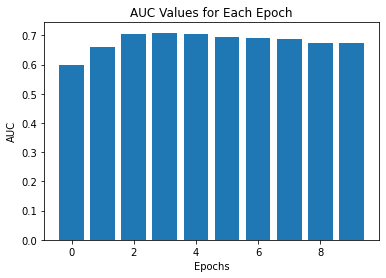

In [ ]:
import matplotlib.pyplot as plt

# Get the keys and values from the dictionary
epochs = list(auc_dict.keys())
auc_values = list(auc_dict.values())

# Create a bar chart of the AUC values
plt.bar(epochs, auc_values)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('AUC Values for Each Epoch')

# Show the plot
plt.show()